# 多因子与复合分析
- 假设检验与方差检验  
根据一定的假设条件，从样本推断总体，或者推断样本与样本之间的关系。也就是说先做出一个分布假设，然后根据该假设的性质，来判断样本符合假设的概率有多大
- 相关系数：皮尔逊、斯皮尔曼
- 回归： 线性回归
- PCA与奇异值分解

## 假设检验
1. 建立原假设H0，H0的反命题H1，也叫备择假设
2. 选择检验统计量
3. 根据显著水平（一般为0.05，意味着要有95%的值复合H0分布），确定拒绝域
4. 计算p值或样本统计值，做出判断

In [2]:
import numpy as np
import scipy.stats as ss
import pandas as pd

In [3]:
#正态分布检验
norm_dist = ss.norm.rvs(size=20)
ss.normaltest(norm_dist) #基于偏度和峰度的检验法

NormaltestResult(statistic=1.095883621140721, pvalue=0.57813850524162)

In [4]:
#卡方检验
ss.chi2_contingency([[15,95],[85,5]])

(126.08080808080808, 2.9521414005078985e-29, 1, array([[55., 55.],
        [45., 45.]]))

In [5]:
#独立t分布检验,检验两组变量的均值有没有差异性
ss.ttest_ind(ss.norm.rvs(size=10),ss.norm.rvs(size=20))

Ttest_indResult(statistic=-1.4727925328885554, pvalue=0.15196007984232854)

In [6]:
ss.ttest_ind(ss.norm.rvs(size=100000),ss.norm.rvs(size=200000))

Ttest_indResult(statistic=1.034373488583882, pvalue=0.3009624271789016)

In [7]:
#方差检验
ss.f_oneway([49,50,39,40,43], [28,32,30,26,34], [38,40,45,42,48])

F_onewayResult(statistic=17.619417475728156, pvalue=0.0002687153079821641)

In [8]:
#qq图，衡量一个分布是否复合正态分布
from statsmodels.graphics.api import qqplot
from matplotlib import pyplot as plt

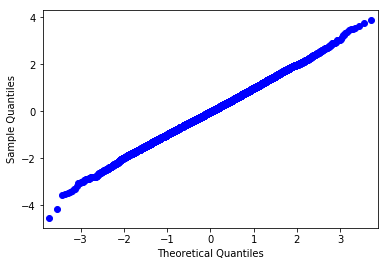

In [9]:
plt.show(qqplot(ss.norm.rvs(size=10000)))

In [10]:
#相关系数
s1 = pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])
s2 = pd.Series([0.5, 0.4, 1.2, 2.5, 1.1,0.7, 0.1])
s1.corr(s2)

0.9333729600465923

In [11]:
s1.corr(s2,method="spearman")

0.7142857142857144

In [12]:
df = pd.DataFrame(np.array([s1,s2]).T)
df

,0,1
0,0.1,0.5
1,0.2,0.4
2,1.1,1.2
3,2.4,2.5
4,1.3,1.1
5,0.3,0.7
6,0.5,0.1


In [13]:
df.corr()

,0,1
0,1.000000,0.933373
1,0.933373,1.000000


In [14]:
#线性回归
x = np.arange(10).astype(np.float).reshape([10,1])
y = x*3 + 4 + np.random.random()
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
res = reg.fit(x,y)
y_pred = reg.predict(x)
print(y_pred)
print(reg.coef_)
print(reg.intercept_)

[[ 4.95639263]
 [ 7.95639263]
 [10.95639263]
 [13.95639263]
 [16.95639263]
 [19.95639263]
 [22.95639263]
 [25.95639263]
 [28.95639263]
 [31.95639263]]
[[3.]]
[4.95639263]


In [15]:
#主成分分析
data = np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]).T
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

In [16]:
from sklearn.decomposition import PCA
lower_dim = PCA(n_components=1)
lower_dim.fit(data)
print(lower_dim.explained_variance_ratio_)

[0.96318131]


In [18]:
lower_dim.fit_transform(data)

array([[-0.82797019],
       [ 1.77758033],
       [-0.99219749],
       [-0.27421042],
       [-1.67580142],
       [-0.9129491 ],
       [ 0.09910944],
       [ 1.14457216],
       [ 0.43804614],
       [ 1.22382056]])